# Домашнее задание по теме: Обработка пропущенных значений

## Подготовка окружения

In [ ]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

# Для MacOS/Ubuntu
# !which pip

# Для Windows
# !where pip

In [7]:
!conda install matplotlib numpy missingno scikit-learn -y

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\skovalchuk\Anaconda3

  added / updated specs:
    - matplotlib
    - missingno
    - numpy
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.1               |   py38haa95532_1         2.9 MB
    missingno-0.4.2            |     pyhd3eb1b0_1          15 KB
    ------------------------------------------------------------
                                           Total:         2.9 MB

The following NEW packages will be INSTALLED:

  missingno          pkgs/main/noarch::missingno-0.4.2-pyhd3eb1b0_1

The following packages will be UPDATED:

  conda                                4.9.2-py38haa95532_0 --> 4.10.1-py38haa95532_1




missingno-0.4.2      | 15 KB     |            |   0% 
missingno-0.4.2      | 15 KB     | ########## | 100% 
missingno-0.4.2      | 15 KB     

In [1]:
import numpy as np

np.__version__

'1.19.2'

In [2]:
import pandas as pd

pd.__version__

'1.1.3'

In [3]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.__version__

'3.3.2'

In [4]:
import sklearn
import sklearn.impute

sklearn.__version__

'0.23.2'

In [5]:
import seaborn as sns

sns.__version__

'0.11.0'

In [8]:
import missingno as msno

msno.__version__

'0.4.2'

## Загрузка данных

[Источник (Mental Health in Tech Survey)](https://www.kaggle.com/osmi/mental-health-in-tech-survey)

ВНИМАНИЕ: Предварительно датасет необходимо скачать к себе на локальный компьютер.

*Может потребоваться передать в метод `read_csv` параметр `low_memory=False`.

In [10]:
# загрузить датасет в pandas dataframe
df = pd.read_csv('survey.csv')
# показать все колонки
df.info()
# вывести первые 5 и последние 5 строк
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


## Обнаружение пропущенных значений

### Показать количество пропущенных значений в каждом столбце с помощью метода из `pandas`.

Стандартный поиск: `None`, `NaN`, `NA`, ...

Можно использовать любой метод.

In [11]:
df.isna().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

### Показать пропущенные значения с помощью `missingno`.

Можно использовать любой метод.

<AxesSubplot:>

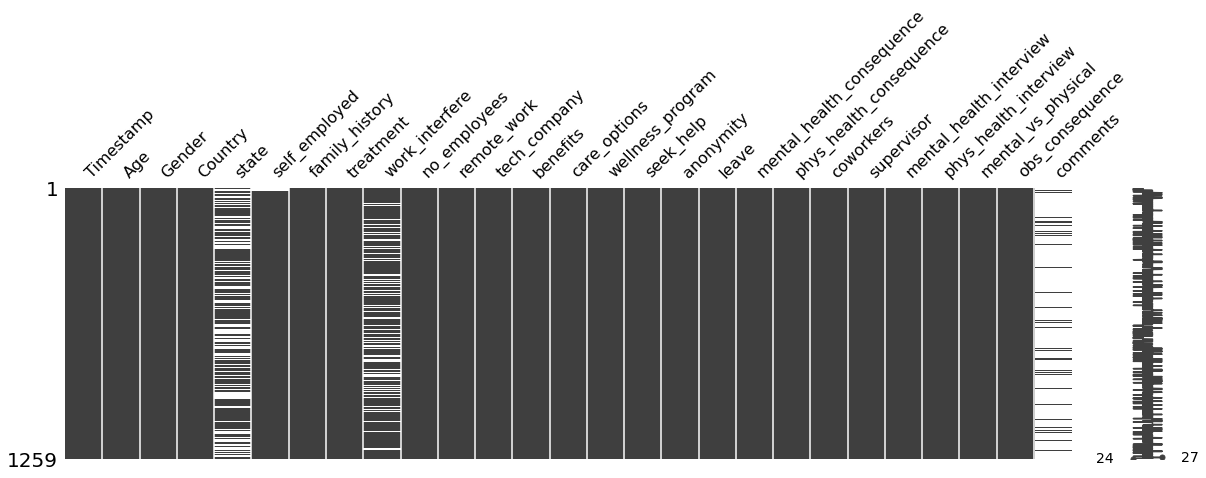

In [12]:
msno.matrix(df, figsize=(20, 5))

### Написать выводы.

Сколько колонок НЕ содержат пропуски: `23`

Настолько пустые колонки, что можно было бы их удалить из-за недостатка информации: `1 колонку - Comments`

Свои мысли в свободной форме: `Следует полностью удалить колонку Comments. Колонку State можно попробовать заполнить модой. Колонку Self Employed лучше не трогать, просто удалить строки. Колонку work_interfere можно заполнить в соответствии с колонкой treatment. Если человек страдает психическим заболеванием, то логично предположить, что оно мешает ему работать. Кроме того, treatment полностью заполнена.`

## Полный анализ случаев (Complete-Case Analysis)

Удалить слишком пустые колонки (самостоятельно решить какие именно, например, где пропущенных значений больше 50%), а затем удалить все строки с оставщимися пропущенными значениями.

Вычислить сколько строк и столбцов было удалено.

In [14]:
columns_with_na = df.columns[df.isna().any()]
columns_with_na, len(columns_with_na)

columns_without_na = df.columns[~df.isna().any()]
columns_without_na, len(columns_without_na)

percent_missing = df[columns_with_na].isnull().sum() * 100 / len(df)
percent_missing.sort_values(ascending=False)

too_missing = percent_missing[percent_missing > 50]
too_missing.index

df_without_na = df.drop(columns=too_missing.index.to_list())

df_without_na = df_without_na.dropna()
df_without_na

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
18,2014-08-27 11:34:53,46,male,United States,MD,Yes,Yes,No,Sometimes,1-5,...,Yes,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes
20,2014-08-27 11:35:12,29,Male,United States,NY,No,Yes,Yes,Sometimes,100-500,...,No,Somewhat difficult,Maybe,No,Some of them,Some of them,No,No,No,No
21,2014-08-27 11:35:24,31,male,United States,NC,Yes,No,No,Never,1-5,...,Yes,Somewhat difficult,No,No,Some of them,Some of them,No,Maybe,Yes,No
22,2014-08-27 11:35:48,46,Male,United States,MA,No,No,Yes,Often,26-100,...,Don't know,Don't know,Maybe,No,Some of them,Yes,No,Maybe,No,No
23,2014-08-27 11:36:24,41,Male,United States,IA,No,No,Yes,Never,More than 1000,...,Don't know,Don't know,Maybe,No,No,No,No,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,2015-08-20 16:52:09,29,male,United States,NC,No,Yes,Yes,Sometimes,100-500,...,Yes,Don't know,Yes,No,Some of them,No,No,Maybe,No,No
1253,2015-08-25 19:59:38,36,Male,United States,UT,No,Yes,No,Rarely,More than 1000,...,Don't know,Somewhat easy,Maybe,Maybe,Some of them,Some of them,No,No,Don't know,No
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No


## Median Imputation

В колонке `Permit Type` заменить пропущенные значения на медиану с помощью `sklearn.impute.SimpleImputer`. 

Результат сохранить в новую колонку `Permit Type Imp`.

In [18]:
imp_frequent = sklearn.impute.SimpleImputer(missing_values=np.nan,
                                            strategy='most_frequent')
imp_frequent

df['state Imp'] = imp_frequent.fit_transform(df[["state"]])
df[['state', 'state Imp']]

,state,state Imp
0,IL,IL
1,IN,IN
2,NaN,CA
3,NaN,CA
4,TX,TX
...,...,...
1254,NaN,CA
1255,IL,IL
1256,CA,CA
1257,NC,NC
